# Loading libraries and data

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import missingno as msno


data = pd.read_excel('marks.xlsx', sheet_name='Sheet1')
data.shape
#msno.matrix(data)


(626, 3)

# Quick look at the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ut1     626 non-null    int64
 1   ut2     626 non-null    int64
 2   model   626 non-null    int64
dtypes: int64(3)
memory usage: 14.8 KB


In [4]:
data

,ut1,ut2,model
0,46,60,50
1,64,26,51
2,34,52,50
3,46,6,2
4,44,28,70
...,...,...,...
621,0,0,4
622,0,0,19
623,0,4,28
624,72,74,60


In [5]:
data.columns

Index(['ut1', 'ut2', 'model'], dtype='object')


# Visualize missing values 


<Axes: >

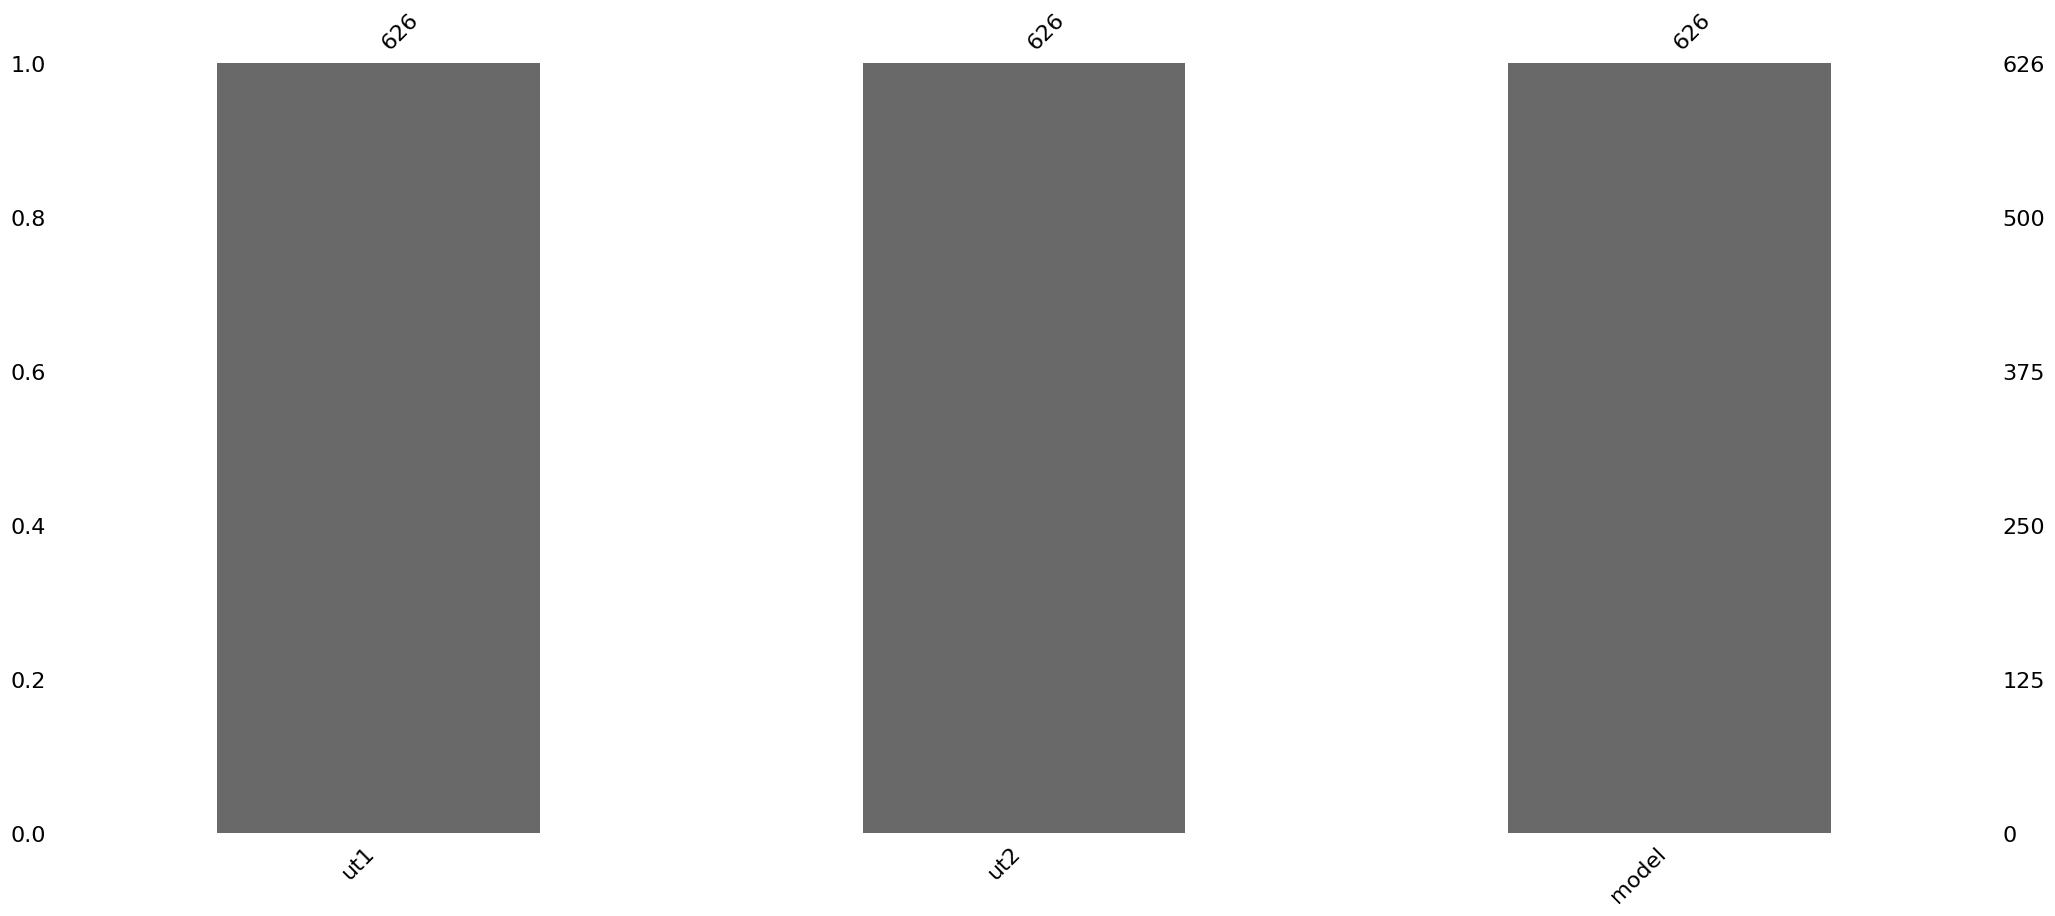

In [6]:
msno.bar(data)


c:\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Python310\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

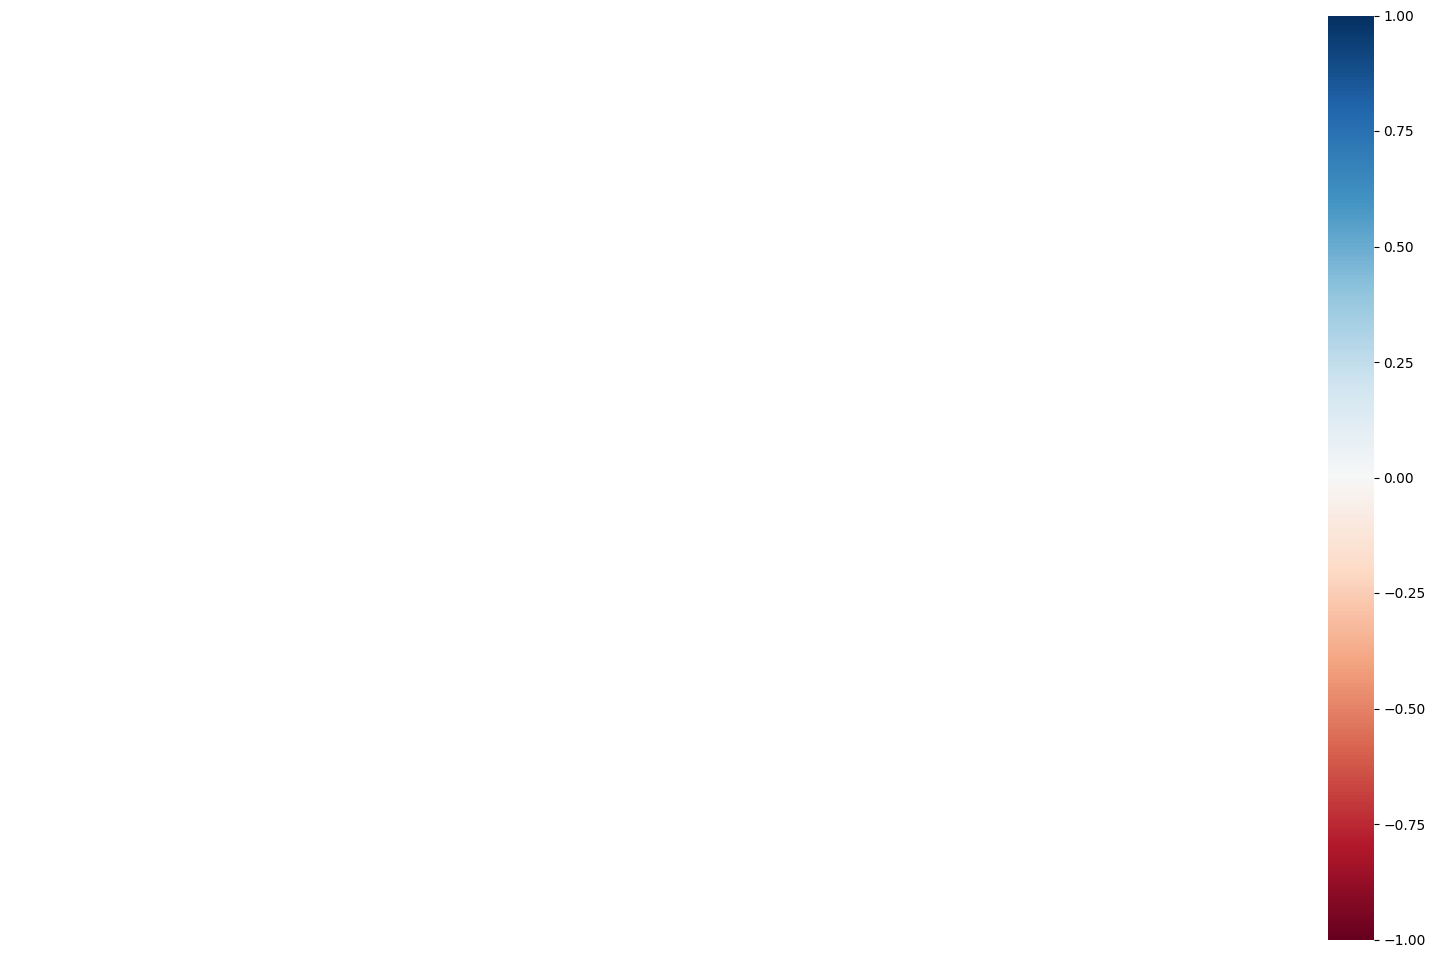

In [7]:

msno.heatmap(data)


c:\Python310\lib\site-packages\scipy\cluster\hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

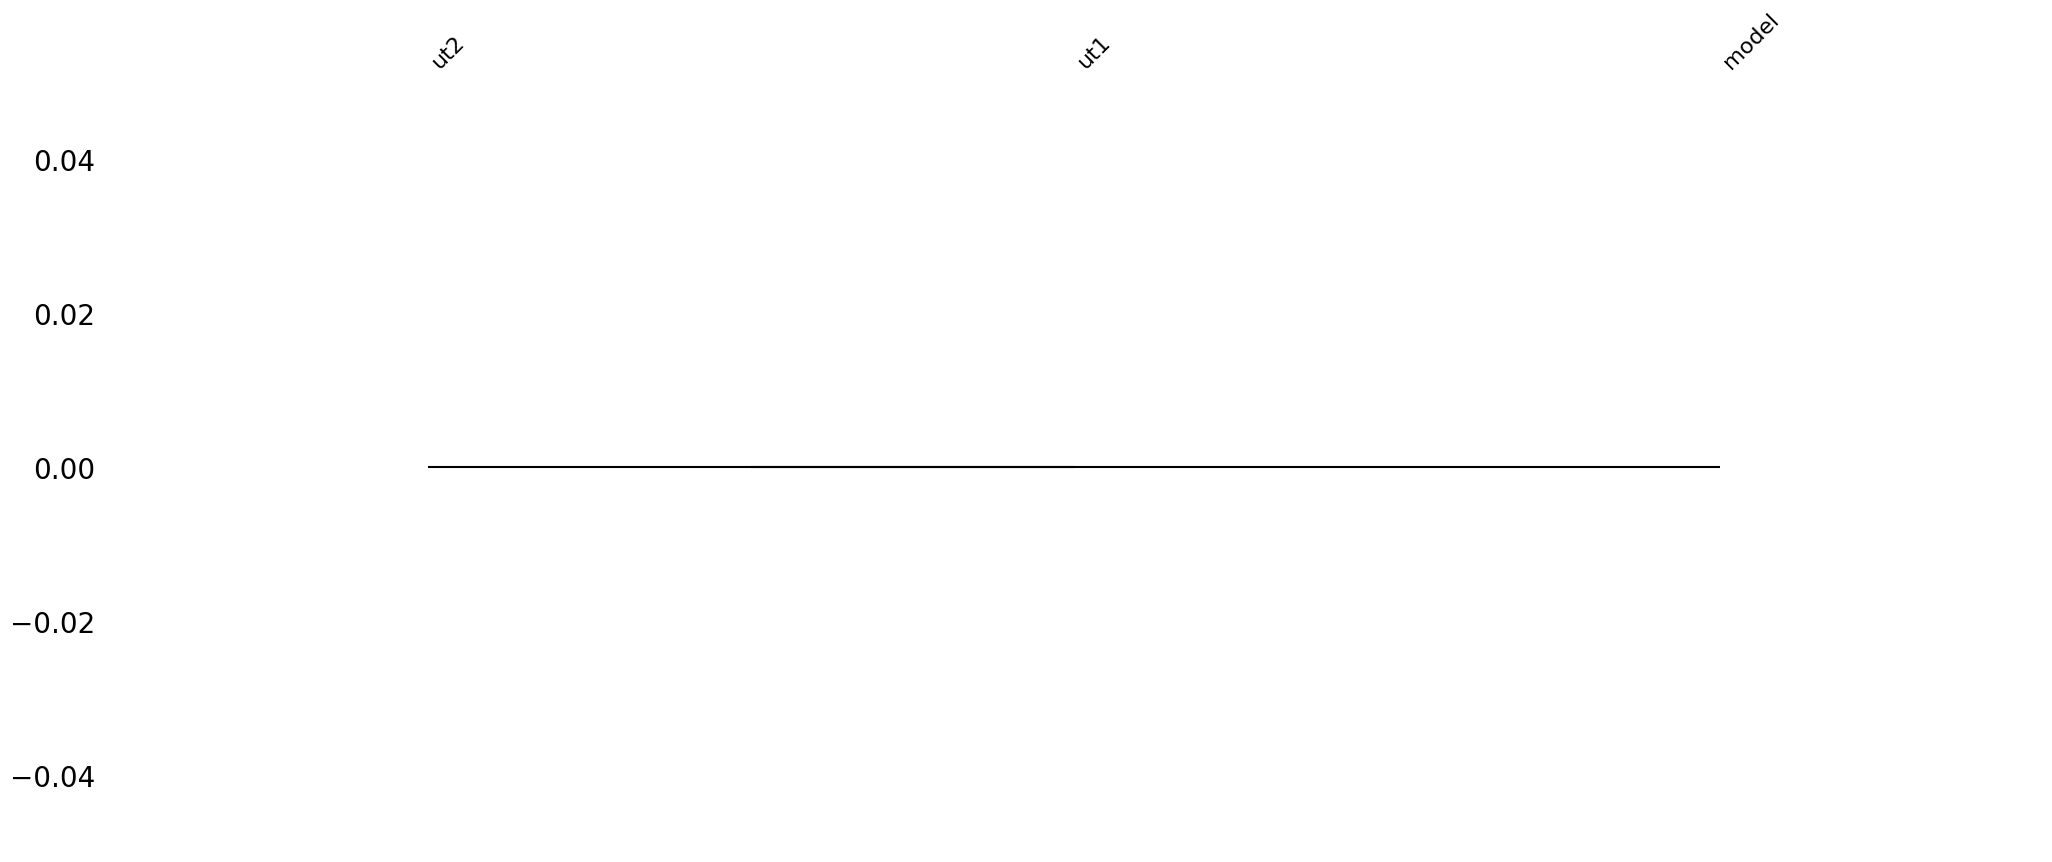

In [8]:

msno.dendrogram(data)

In [9]:
data.notna().any()

ut1      True
ut2      True
model    True
dtype: bool

In [10]:
data.isna() 
#The isna() method returns a DataFrame object where all the 
# values are replaced with a Boolean value True for NA (not-a -number) values, 
# and otherwise False.

,ut1,ut2,model
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
621,False,False,False
622,False,False,False
623,False,False,False
624,False,False,False


In [11]:
data.isna().sum()

ut1      0
ut2      0
model    0
dtype: int64

In [12]:
data.fillna(0)

,ut1,ut2,model
0,46,60,50
1,64,26,51
2,34,52,50
3,46,6,2
4,44,28,70
...,...,...,...
621,0,0,4
622,0,0,19
623,0,4,28
624,72,74,60


In [13]:
data.isna().sum()

ut1      0
ut2      0
model    0
dtype: int64

In [14]:

df2= data.apply(lambda x: x.replace({'AAA':0, 'AB':0,'A':0,'Ab':0,'OD':0}, regex=True))
#df2=data.replace(to_replace='AAA', value=0, inplace=True)
print(df2)

     ut1  ut2  model
0     46   60     50
1     64   26     51
2     34   52     50
3     46    6      2
4     44   28     70
..   ...  ...    ...
621    0    0      4
622    0    0     19
623    0    4     28
624   72   74     60
625    0   56     46

[626 rows x 3 columns]


In [15]:
df2.describe()

,ut1,ut2,model
count,626.000000,626.000000,626.000000
mean,42.822684,42.386581,49.167732
std,26.864856,28.811399,24.270456
min,0.000000,0.000000,0.000000
25%,20.000000,16.000000,33.000000
50%,46.000000,47.000000,52.000000
75%,64.000000,64.000000,67.000000
max,100.000000,100.000000,97.000000


count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [16]:
data.describe()

#"top" gives the highest counted value of the categorical values.

,ut1,ut2,model
count,626.000000,626.000000,626.000000
mean,42.822684,42.386581,49.167732
std,26.864856,28.811399,24.270456
min,0.000000,0.000000,0.000000
25%,20.000000,16.000000,33.000000
50%,46.000000,47.000000,52.000000
75%,64.000000,64.000000,67.000000
max,100.000000,100.000000,97.000000


In [17]:
data['ut1'] = pd.to_numeric(data['ut1'],errors='coerce')
data = data.replace(np.nan, 0, regex=True)
data['ut1'] = data['ut1'].astype(int)

data

file_name = 'Marks.xlsx'
  # saving the excel
data.to_excel(file_name)
#data.model.unique()

In [18]:
data.isna().sum()

ut1      0
ut2      0
model    0
dtype: int64

c:\Python310\lib\site-packages\scipy\cluster\hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

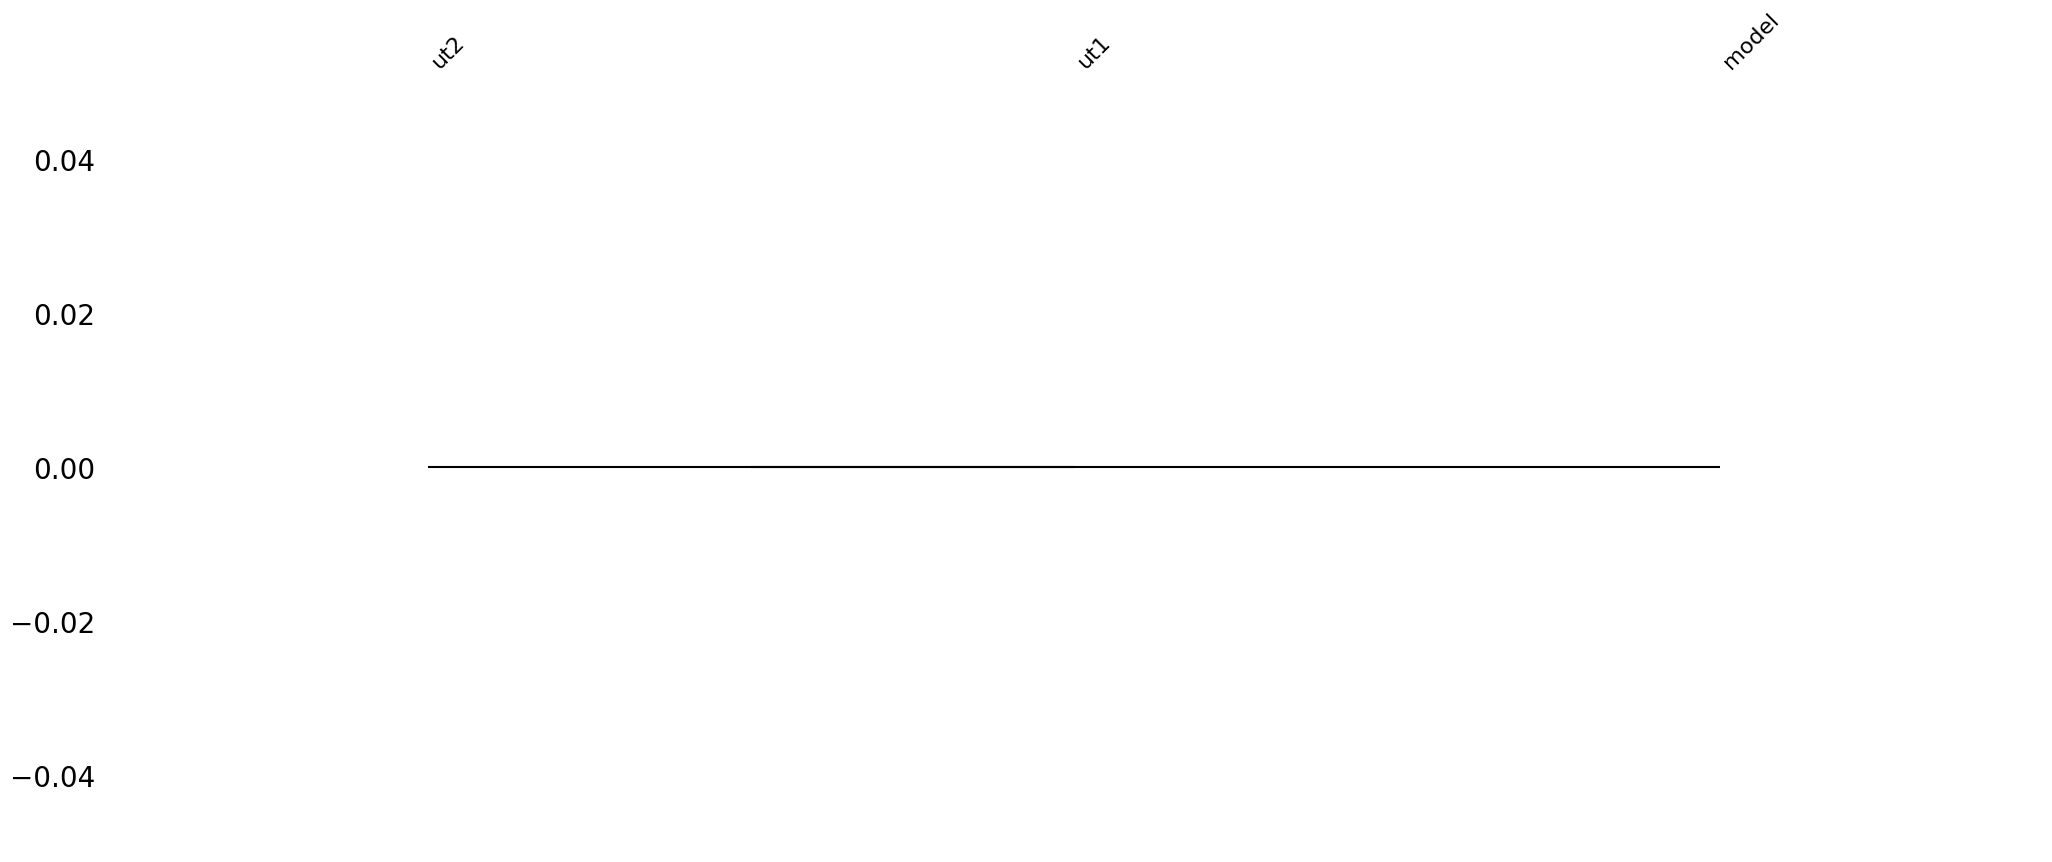

In [19]:
msno.dendrogram(data)

In [25]:

from openpyxl import load_workbook





X = data.iloc[:, 0:-2]
y = data.iloc[:, -2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


#print(X_train, X_test, y_train, y_test)
#Create a linear regression model and fit it on the training data
model = LinearRegression()
model.fit(X_train, y_train) 


y_pred = model.predict(X_test)
print(type(y_test),type(y_pred))


#Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Mean squared error:', mse)
print('root Mean squared error:', rmse)


wb_col = load_workbook("Marks.xlsx")
sheet = wb_col.active
row=2
sheet.cell(row=1, column=6).value ="predicted output"
sheet.cell(row=1, column=7).value ="y_test output"
for i in y_pred:
      sheet.cell(row, column=6).value = int(i) 
      row +=1

df=pd.Series(y_test ) 
type(df)
row=2
for j in df:
      sheet.cell(row, column=7).value = int(j) 
      row +=1
wb_col.save('Marks.xlsx')




<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
Mean squared error: 698.7760942937674
root Mean squared error: 26.434373347854635
